Here is the notebook file of my python project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sb
import re

Import and clean the data of any NaNs in the relevant columns

In [2]:
movies = pd.read_csv('moviedatabase/tmdb_5000_movies.csv')
movies_cl = movies.dropna(subset=['runtime', 'revenue', 'keywords', 'budget'])
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
movies.keys()

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

Create a revenue to runtime relationship (this ends up being unused)

(0.0, 320.0)

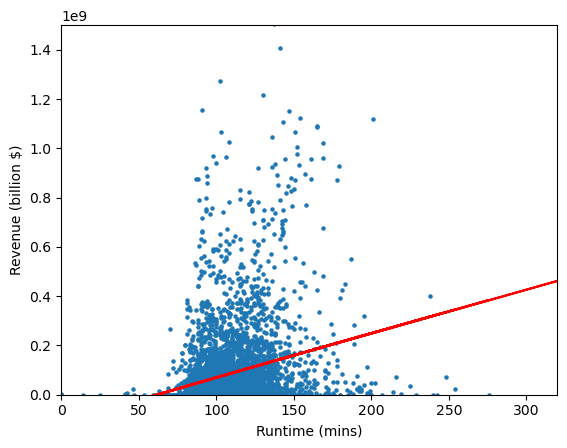

In [4]:
runtimerevcoeff = np.polyfit(movies_cl['runtime'], movies_cl['revenue'], 2)
runtimerevval = np.polyval(runtimerevcoeff, movies_cl['runtime'])
plt.scatter(movies_cl['runtime'], movies_cl['revenue'], s=5)
plt.plot(movies_cl['runtime'], runtimerevval, '-r')
plt.xlabel('Runtime (mins)')
plt.ylabel('Revenue (billion $)')
plt.ylim(0,1.5e9)
plt.xlim(0,320)

Create two new columns: revenue/budget and profit

In [5]:
movies_cl['revenue/budget'] = movies_cl['revenue'] / movies_cl['budget']
movies_cl['profit'] = movies_cl['revenue'] - movies_cl['budget']
print(movies_cl['profit'])

0       2550965087
1        661000000
2        635674609
3        834939099
4         24139100
           ...    
4798       1820920
4799         -9000
4800             0
4801             0
4802             0
Name: profit, Length: 4801, dtype: int64


C:\Users\tompa\AppData\Local\Temp\ipykernel_25404\2032910610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_cl['revenue/budget'] = movies_cl['revenue'] / movies_cl['budget']
C:\Users\tompa\AppData\Local\Temp\ipykernel_25404\2032910610.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_cl['profit'] = movies_cl['revenue'] - movies_cl['budget']


This produces a list of every genre id

In [6]:
genre_ID = []
for i in range(0, int(len(movies_cl['genres']))):
    genre_ID.append([int(s) for s in re.findall(r'\b\d+\b', movies_cl['genres'].iloc[i])])
    
print(genre_ID)

[[28, 12, 14, 878], [12, 14, 28], [28, 12, 80], [28, 80, 18, 53], [28, 12, 878], [14, 28, 12], [16, 10751], [28, 12, 878], [12, 14, 10751], [28, 12, 14], [12, 14, 28, 878], [12, 28, 53, 80], [12, 14, 28], [28, 12, 37], [28, 12, 14, 878], [12, 10751, 14], [878, 28, 12], [12, 28, 14], [28, 35, 878], [28, 12, 14], [28, 12, 14], [28, 12], [12, 14], [12, 14], [12, 18, 28], [18, 10749, 53], [12, 28, 878], [53, 28, 12, 878], [28, 12, 878, 53], [28, 12, 53], [28, 12, 14], [28, 12, 878], [10751, 14, 12], [12, 28, 878, 53], [16, 10751], [878, 28, 12], [878, 28, 12], [14, 12, 10751], [28, 12, 14], [12, 28, 878], [16, 10751, 12, 35], [12, 28, 53, 878], [16, 10751, 35], [28, 878, 53], [28], [28, 18, 27, 878, 53], [28, 12, 14, 878], [28, 12, 878], [28, 10751, 14], [18, 10749], [12, 14, 28, 10749], [28, 878, 12], [28, 878, 12], [12, 28], [12, 16, 10751], [16, 12, 35, 10751, 28, 14], [28, 12, 878], [16, 10751], [28, 35, 80, 53], [28, 12, 878], [16, 18], [878, 14, 28, 12], [28, 12], [12, 10751, 14], [8

This removes duplicates and changes to a list

In [7]:
# find all unique IDs in the genre_ID list
genre_ID_nodup = []
for i in range(0, len(genre_ID)):
    for j in range(0, len(genre_ID[i])):
        if genre_ID[i][j] not in genre_ID_nodup:
            genre_ID_nodup.append(genre_ID[i][j])

print(genre_ID_nodup)

[28, 12, 14, 878, 80, 18, 53, 16, 10751, 37, 35, 10749, 27, 9648, 36, 10752, 10402, 99, 10769, 10770]


Next, we map the genre IDs to the genre names

In [8]:
genre_ID_nodup_sort = sorted(genre_ID_nodup)
genre_names = ['Adventure', 'Fantasy', 'Animation', 'Drama', 'Horror', 'Action', 'Comedy', 'History', 'Western', 'Thriller', 'Crime', 'Documentary', 'Science Fiction', 'Mystery', 'Music', 'Romance', 'Family', 'War', 'Foreign', 'TV Movie']

Find out the frequncy of genres in the top 5000 movies

In [9]:
# create new dataframe consisting of name, IDs and frequency
genre_freq = pd.DataFrame({'Name':genre_names, 'IDs':genre_ID_nodup_sort, 'Frequency':np.zeros(len(genre_ID_nodup_sort))})

# for each movie in dataset, go through ids and add 1 to id whenever one is found
for i in range(0, len(genre_ID)):
    for j in range(0, len(genre_ID[i])):
        genre_freq.loc[genre_ID_nodup_sort.index(genre_ID[i][j]), 'Frequency'] += 1


print(genre_freq)

               Name    IDs  Frequency
0         Adventure     12      790.0
1           Fantasy     14      424.0
2         Animation     16      234.0
3             Drama     18     2296.0
4            Horror     27      519.0
5            Action     28     1154.0
6            Comedy     35     1722.0
7           History     36      197.0
8           Western     37       82.0
9          Thriller     53     1274.0
10            Crime     80      696.0
11      Documentary     99      109.0
12  Science Fiction    878      535.0
13          Mystery   9648      348.0
14            Music  10402      185.0
15          Romance  10749      894.0
16           Family  10751      513.0
17              War  10752      144.0
18          Foreign  10769       34.0
19         TV Movie  10770        8.0


Produce a graph of genre versus frequency in top 5000

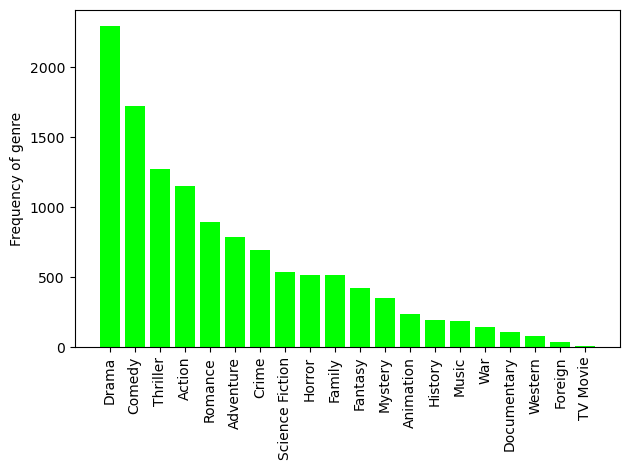

In [32]:
# plot bar chart of frequencies
genre_freq = genre_freq.sort_values(by=['Frequency'], ascending=False)
plt.bar(x=genre_freq['Name'], height=genre_freq['Frequency'], color='lime')
plt.xticks(rotation=90)
plt.ylabel('Frequency of genre')
plt.tight_layout()
plt.savefig('genre_frequency')

Voting average for each genre

In [11]:
genre_freq['vote_total'] = np.zeros(len(genre_freq['Frequency']))

# for each movie in dataset, add the voter mean to a total vote column
for i in range(0, len(genre_ID)):
    for j in range(0, len(genre_ID[i])):
        genre_freq.loc[genre_ID_nodup_sort.index(genre_ID[i][j]), 'vote_total'] += movies_cl['vote_average'].iloc[i]

genre_freq['vote_mean'] = genre_freq['vote_total']/genre_freq['Frequency']
print(genre_freq)

               Name    IDs  Frequency  vote_total  vote_mean
3             Drama     18     2296.0     14667.3   6.388197
6            Comedy     35     1722.0     10238.3   5.945587
9          Thriller     53     1274.0      7658.0   6.010989
5            Action     28     1154.0      6911.9   5.989515
15          Romance  10749      894.0      5549.7   6.207718
0         Adventure     12      790.0      4864.0   6.156962
10            Crime     80      696.0      4366.8   6.274138
12  Science Fiction    878      535.0      3213.0   6.005607
4            Horror     27      519.0      2920.2   5.626590
16           Family  10751      513.0      3093.2   6.029630
1           Fantasy     14      424.0      2585.0   6.096698
13          Mystery   9648      348.0      2152.0   6.183908
2         Animation     16      234.0      1483.9   6.341453
7           History     36      197.0      1323.8   6.719797
14            Music  10402      185.0      1175.8   6.355676
17              War  107

Create a stacked bar chart that shows the average and which genres are below and above

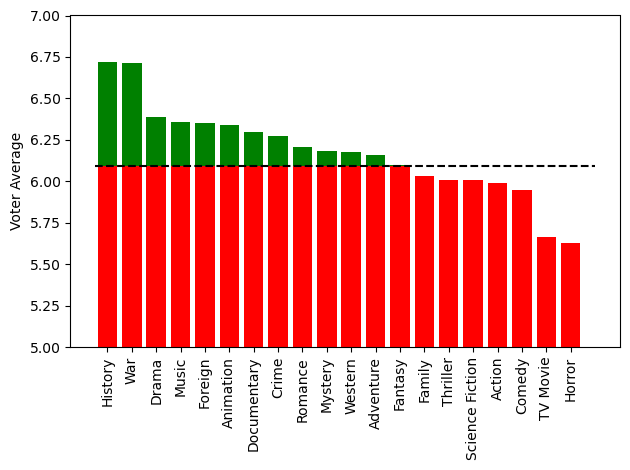

In [37]:
threshold = movies_cl['vote_average'].mean()
values = genre_freq.sort_values(by='vote_mean', ascending=False)['vote_mean']
x = genre_freq.sort_values(by='vote_mean', ascending=False)['Name']

# split it up
above_threshold = np.maximum(values - threshold, 0)
below_threshold = np.minimum(values, threshold)

# and plot it
fig, ax = plt.subplots()
ax.bar(x, below_threshold, color="r")
ax.bar(x, above_threshold, color="g",
        bottom=below_threshold)

# horizontal line indicating the threshold
ax.plot([-0.5, 20], [threshold, threshold], "k--")
ax.set_ylim(5,7)
ax.tick_params('x', labelrotation=90)
ax.set_ylabel('Voter Average')
plt.tight_layout()
plt.savefig('genre_vote.png')

Produce an average profit column

In [13]:
# produce empty column
genre_freq['profit_total'] = np.zeros(len(genre_freq['Frequency']))

# for every movie in the list, go through list of genre IDs and add the profit amount to each one
for i in range(0, len(genre_ID)):
    for j in range(0, len(genre_ID[i])):
        genre_freq.loc[genre_ID_nodup_sort.index(genre_ID[i][j]), 'profit_total'] += movies_cl['profit'].iloc[i]

genre_freq['profit_mean'] = genre_freq['profit_total']/genre_freq['Frequency']
print(genre_freq)

               Name    IDs  Frequency  vote_total  vote_mean  profit_total  \
3             Drama     18     2296.0     14667.3   6.388197  7.222787e+10   
6            Comedy     35     1722.0     10238.3   5.945587  7.917081e+10   
9          Thriller     53     1274.0      7658.0   6.010989  6.252293e+10   
5            Action     28     1154.0      6911.9   5.989515  1.035165e+11   
15          Romance  10749      894.0      5549.7   6.207718  3.548378e+10   
0         Adventure     12      790.0      4864.0   6.156962  1.124433e+11   
10            Crime     80      696.0      4366.8   6.274138  2.665739e+10   
12  Science Fiction    878      535.0      3213.0   6.005607  5.381617e+10   
4            Horror     27      519.0      2920.2   5.626590  1.503597e+10   
16           Family  10751      513.0      3093.2   6.029630  5.726413e+10   
1           Fantasy     14      424.0      2585.0   6.096698  5.503250e+10   
13          Mystery   9648      348.0      2152.0   6.183908  1.

Plot to a graph

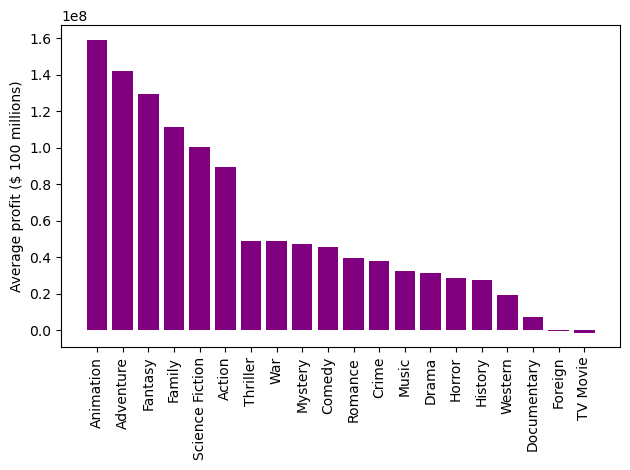

In [31]:
plt.bar(x=genre_freq.sort_values(by='profit_mean', ascending=False)['Name'], height=genre_freq.sort_values(by='profit_mean', ascending=False)['profit_mean'], color='purple')
plt.xticks(rotation=90)
plt.ylabel('Average profit ($ 100 millions)')
plt.tight_layout()
plt.savefig('genre-profit.png')

Produce a graph comparing runtime vs voter opinions

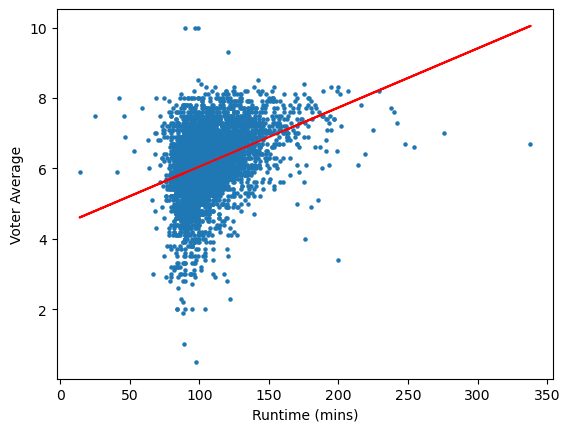

In [33]:
# clean data of zeros in the relevant columns
movies_cl_nozeroruntime = movies_cl[movies_cl['runtime'] != 0]
movies_cl_nozero = movies_cl_nozeroruntime[movies_cl_nozeroruntime['vote_average'] != 0]

# fit the data to a straight line
runtimeratingcoeff = np.polyfit(movies_cl_nozero['runtime'], movies_cl_nozero['vote_average'], 1)
runtimeratval = np.polyval(runtimeratingcoeff, movies_cl_nozero['runtime'])

# plot the data as scatter graph with trend line passing through
plt.scatter(movies_cl_nozero['runtime'], movies_cl_nozero['vote_average'], s=5)
plt.plot(movies_cl_nozero['runtime'], runtimeratval, '-r')
plt.xlabel('Runtime (mins)')
plt.ylabel('Voter Average')
plt.savefig('runtime_rating.png')

Plot runtime to profit

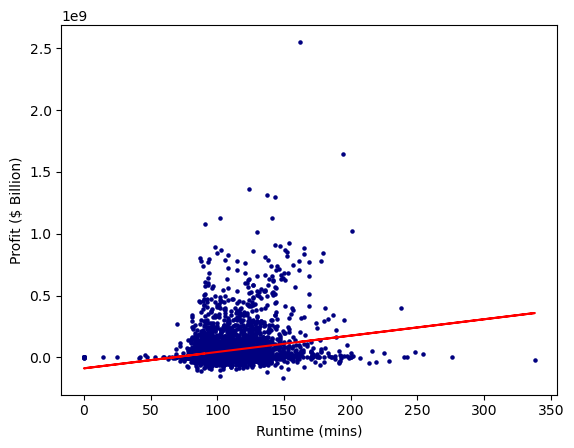

In [26]:
runtimeprofcoeff = np.polyfit(movies_cl['runtime'], movies_cl['profit'], deg=1)
runtimeprofval = np.polyval(runtimeprofcoeff, movies_cl['runtime'])
plt.scatter(movies_cl['runtime'], movies_cl['profit'], s=5, color='navy')
plt.plot(movies_cl['runtime'], runtimeprofval, '-r')
plt.xlabel('Runtime (mins)')
plt.ylabel('Profit ($ Billion)')
plt.savefig('runtime_profit.png')

Runtime vs genre

In [34]:
genre_freq['runtime_total'] = np.zeros(len(genre_freq['Frequency']))

# for every movie in the list, go through list of genre IDs and add the profit amount to each one
for i in range(0, len(genre_ID)):
    for j in range(0, len(genre_ID[i])):
        genre_freq.loc[genre_ID_nodup_sort.index(genre_ID[i][j]), 'runtime_total'] += movies_cl['runtime'].iloc[i]

genre_freq['runtime_mean'] = genre_freq['runtime_total']/genre_freq['Frequency']
print(genre_freq)

               Name    IDs  Frequency  vote_total  vote_mean  profit_total  \
3             Drama     18     2296.0     14667.3   6.388197  7.222787e+10   
6            Comedy     35     1722.0     10238.3   5.945587  7.917081e+10   
9          Thriller     53     1274.0      7658.0   6.010989  6.252293e+10   
5            Action     28     1154.0      6911.9   5.989515  1.035165e+11   
15          Romance  10749      894.0      5549.7   6.207718  3.548378e+10   
0         Adventure     12      790.0      4864.0   6.156962  1.124433e+11   
10            Crime     80      696.0      4366.8   6.274138  2.665739e+10   
12  Science Fiction    878      535.0      3213.0   6.005607  5.381617e+10   
4            Horror     27      519.0      2920.2   5.626590  1.503597e+10   
16           Family  10751      513.0      3093.2   6.029630  5.726413e+10   
1           Fantasy     14      424.0      2585.0   6.096698  5.503250e+10   
13          Mystery   9648      348.0      2152.0   6.183908  1.

Compile this into a bar chart

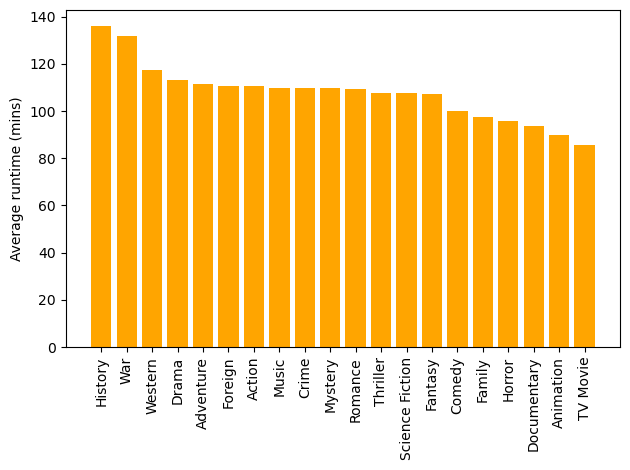

In [35]:
plt.bar(x=genre_freq.sort_values(by='runtime_mean', ascending=False)['Name'], height=genre_freq.sort_values(by='runtime_mean', ascending=False)['runtime_mean'], color='orange')
plt.xticks(rotation=90)
plt.ylabel('Average runtime (mins)')
plt.tight_layout()
plt.savefig('genre-runtime.png')

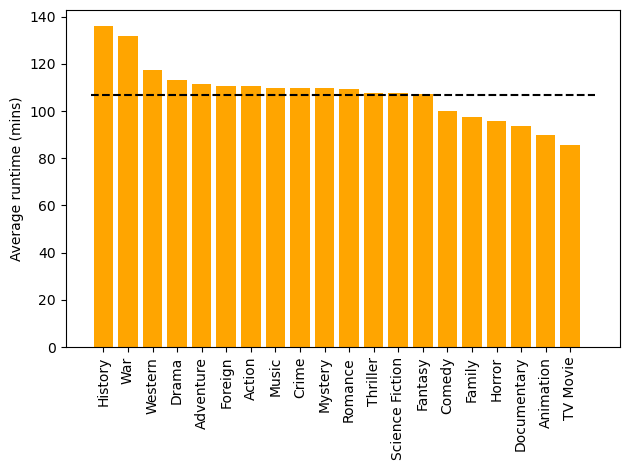

In [36]:
plt.bar(x=genre_freq.sort_values(by='runtime_mean', ascending=False)['Name'], height=genre_freq.sort_values(by='runtime_mean', ascending=False)['runtime_mean'], color='orange')
plt.xticks(rotation=90)
plt.ylabel('Average runtime (mins)')
mean_runtime = movies_cl['runtime'].mean()
plt.plot([-0.5, 20], [mean_runtime, mean_runtime], "k--")
plt.tight_layout()
plt.savefig('genre-runtime-mean.png')